In [1]:
import pandas
import matplotlib.pyplot as plt

In [54]:
import csv
import datetime
import matplotlib.pyplot as plt
f = open('week1.csv', 'r')
flag = -1
tms = []
data = []
reader = csv.reader(f, delimiter=',')
for row in reader:
	if flag == -1:
		flag = 0
		continue
	prot = row[2].replace(' ', '')
	if prot != 'TCP':
		continue 
	# print(row[2])
	try:
		data.append(int(row[8]))
		tms.append(datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f'))
	except Exception as e:
		continue
	if len(tms) > 1000000:
		break
st = tms[0]
cnt = 0
sums = 0
points = []
x = []
y= []
#print(len(tms), len(data))
for i in range(len(data)):
	if tms[i] > st + datetime.timedelta(seconds = 60):
		st = st + datetime.timedelta(seconds = 60)
		points.append([cnt, sums])
		x.append(cnt)
		y.append(sums)
		# print([cnt, sums])
		cnt = 0
		sums = 0
	sums = sums + data[i]
	cnt = cnt+1
	if len(points) > 100000:
		break
	
    

In [61]:
x = [i for i in x if i>100]

In [62]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [89]:
dataset = x
numpy.random.seed(7)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = numpy.array(dataset)
dataset = dataset.reshape(-1, 1)
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
print(model.summary())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 3s - loss: 0.0697 - acc: 0.0029
Epoch 2/100
 - 0s - loss: 0.0362 - acc: 0.0029
Epoch 3/100
 - 0s - loss: 0.0271 - acc: 0.0029
Epoch 4/100
 - 0s - loss: 0.0246 - acc: 0.0029
Epoch 5/100
 - 0s - loss: 0.0232 - acc: 0.0029
Epoch 6/100
 - 0s - loss: 0.0219 - acc: 0.0029
Epoch 7/100
 - 0s - loss: 0.0206 - acc: 0.0029
Epoch 8/100
 - 0s - loss: 0.0194 - acc: 0.0057
Epoch 9/100
 - 0s - loss: 0.0184 - acc: 0.0057
Epoch 10/100
 - 0s - loss: 0.0176 - acc: 0.0057
Epoch 11/100
 - 0s - loss: 0.0171 - acc: 0.0057
Epoch 12/100
 - 

In [90]:

loss, acc = model.evaluate(testX, testY, verbose=0)
print(acc, loss)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict



0.0 0.013933484780204576
Train Score: 696.36 RMSE
Test Score: 745.19 RMSE


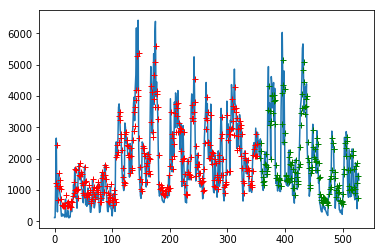

In [92]:
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(dataset)
plt.plot(trainPredictPlot, 'r+')
plt.plot(testPredictPlot, 'g+')

In [66]:
len(x)



529